# Importing Libraries

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import cross_validate,learning_curve
from sklearn.model_selection import cross_val_predict

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

In [2]:
np.random.seed(306)
plt.style.use('seaborn-v0_8')

In [3]:
shuffle_split_cv = ShuffleSplit(n_splits=10, test_size=0.2 , random_state=0)

# Load the dataset

In [5]:
features , labels = fetch_california_housing(as_frame=True , return_X_y=True)

In [6]:
print("Shape of feature matrix :", features.shape)
print("Shape of labels matrix :", labels.shape)

Shape of feature matrix : (20640, 8)
Shape of labels matrix : (20640,)


In [7]:
# make sure the number of rows in feature matrix and labels match

assert(features.shape[0] == labels.shape[0])

# Preprocessing & Model Building

### Train Test Split

In [10]:
#all data exploration and tuning is performed on training set

train_features , test_features , train_labels , test_lables = train_test_split(features, labels , random_state = 42)

In [11]:
print("Shape of training samples :", train_features.shape)
print("Shape of test samples :", test_features.shape)


Shape of training samples : (15480, 8)
Shape of test samples : (5160, 8)


In [35]:
#make sure the training feature matrix has the same number of rows as training label vector
#check for testing set too

assert(train_features.shape[0] == train_labels.shape[0])
assert(test_features.shape[0] == test_lables.shape[0])

### Pipeline : Preprocessing + model

In [56]:
#set up the linear regression model
lin_reg_pipeline = Pipeline([
    ('feature_scaling',StandardScaler()),
    ('linear_reg',LinearRegression())
])

#train linear regression model with normal equation
lin_reg_pipeline.fit(train_features,train_labels)

Pipeline(steps=[('feature_scaling', StandardScaler()),
                ('linear_reg', LinearRegression())])

In [17]:
print("Intercept (w0): ",lin_reg_pipeline[-1].intercept_)
print("Weight Vector (w1....wM): ",lin_reg_pipeline[-1].coef_)

Intercept (w0):  2.0703489205426377
Weight Vector (w1....wM):  [ 0.85210815  0.12065533 -0.30210555  0.34860575 -0.00164465 -0.04116356
 -0.89314697 -0.86784046]


# Model Evaluation

In [39]:
test_score = lin_reg_pipeline.score(test_features, test_lables)
print("Model performance on test set : " ,test_score)

train_score = lin_reg_pipeline.score(train_features, train_labels)
print("Model performance on test set : " ,train_score)

Model performance on test set :  0.5910509795491352
Model performance on test set :  0.609873031052925


1. The score methods returns r2 score whose best value is 1 .
2. The r2 scores on training and test are comparable but they are not that high.
3. It indicates the underfitting issue inn model traning

# Cross Validatted score

In [58]:
lin_reg_score = cross_val_score ( lin_reg_pipeline ,
                                    train_features , 
                                    train_labels,
                                    scoring  ='neg_mean_squared_error',
                                    cv = shuffle_split_cv)
print(lin_reg_score)

print(f"\n Score of Linear Regression on test set : \n"
      f"{lin_reg_score.mean():.3f} +/- {lin_reg_score.std():.3f}")

[-0.50009976 -0.52183352 -0.55931218 -0.52110499 -0.56059203 -0.50510767
 -0.52386194 -0.54775518 -0.5007161  -0.54713448]

 Score of Linear Regression on test set : 
-0.529 +/- 0.022


1. This is the average score of  linear regression model across all cross-validation folds, expressed as a negative value because the scoring metric is neg_mean_squared_error.
2. To interpret this,  lower MSE values indicate better model performance.
3. A smaller standard deviation indicates that the model's performance is consistent across folds

In [61]:
lin_reg_mse = -lin_reg_score
print(f"MSE of Linear Regression in test set:\n"
      f"{lin_reg_mse.mean():.3f} +/- {lin_reg_mse.std():.3f}")

MSE of Linear Regression in test set:
0.529 +/- 0.022


# Cross Validation

The lin_reg_cv_results is dictionary 
* trained estimators
* time taken for fitting (fit_time) and scoring (score_time) the models in cross validation
* training score
* test score

In [68]:
# Evaluate metric(s) by cross-validation and also record fit/score times.

lin_reg_cv_results = cross_validate(lin_reg_pipeline,
                                    train_features,
                                    train_labels, 
                                    cv=shuffle_split_cv,
                                    return_train_score = True,
                                    return_estimator=True)
lin_reg_cv_results

{'fit_time': array([0.01417065, 0.01523924, 0.0125649 , 0.00799823, 0.00863552,
        0.01586509, 0.01771164, 0.01077867, 0.01650238, 0.00914097]),
 'score_time': array([0.00522447, 0.00701094, 0.        , 0.        , 0.00750589,
        0.        , 0.0035181 , 0.00550652, 0.        , 0.        ]),
 'estimator': [Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('linear_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('linear_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('linear_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('linear_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('linear_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('linear_reg', LinearRegression())]),
  Pipel

There are 10 folds hence 1- values in each dictionary key

In [77]:
# multiplying each score by -1 to convert them to errors

train_error = -1 * lin_reg_cv_results['train_score']
test_error = -1 * lin_reg_cv_results['test_score']

print(f"Mean Sqaured Error of linear Regression model on each train set\n"
      f"{train_error.mean():.3f} +/- {train_error.std():.3f}")

print(f"Mean Sqaured Error of linear Regression model on each test set\n"
      f"{test_error.mean():.3f} +/- {test_error.std():.3f}")

Mean Sqaured Error of linear Regression model on each train set
-0.612 +/- 0.005
Mean Sqaured Error of linear Regression model on each test set
-0.601 +/- 0.019


# Effect of training set size on error

In [100]:
def plot_learning_curve(train_sizes, train_scores, test_scores):

    train_scores_mean = np.mean(-train_scores , axis = 1)
    train_scores_std = np.std(-train_scores , axis = 1)
    test_scores_mean = np.mean(-test_scores , axis = 1)
    test_scores_std = np.std(-test_scores , axis = 1)
    fit_times_mean = np.mean(fit_times, axis = 1)
    fit_times_std = np.std(fit_times , axis = 1)

    plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha = 0.1,
        color="r",)

    plt.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha = 0.1,
        color="g",)

    plt.plot(train_sizes, train_scores_mean , "o-" , color="r" , label="Training score")
    plt.plot(train_sizes, test_scores_mean , "o-" , color="g", label="Cross Validation Score")
    plt.xlabel("Training Examples")
    plt.ylabel("MSE")
    plt.legend(loc="best")



In [102]:
def plt_scalibility_curve(train_sizes, fit_times):
    fit_times_mean = np.mean(fit_times, axis = 1)
    fit_times_std = np.std(fit_times , axis = 1)
    plt.fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha = 0.1,)
    plt.plot(train_sizes , fit_times_mean, "o-")
    plt.xlabel("Training Examples")
    plt.ylabel("Fit Time")
    plt.title("Scalability of the model")
    

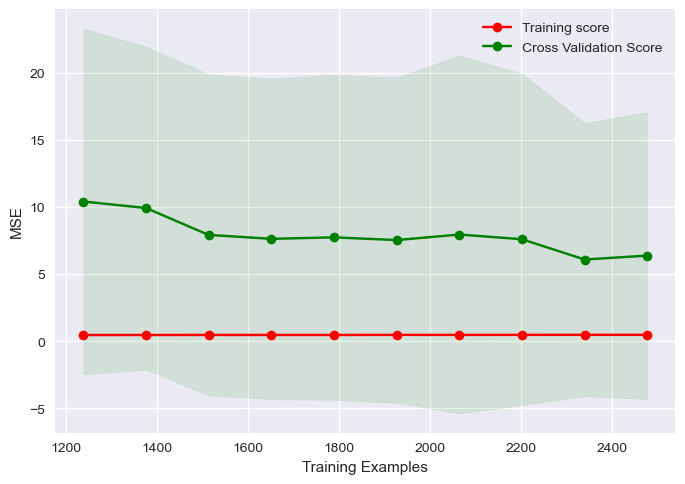

In [104]:
# Learning curve.
# Determines cross-validated training and test scores for different training set sizes.

# n_jobs :
# Number of jobs to run in parallel. 
# -1 means using all processors.

# return_times : 
# Whether to return the fit and score times.

(train_sizes , train_scores , test_scores ,fit_times , score_times) = \
    learning_curve(lin_reg_pipeline , train_features , train_labels ,
                   cv = shuffle_split_cv,
                   scoring='neg_mean_squared_error',
                   n_jobs=-1,
                   return_times = True,
                   train_sizes = np.linspace(0.2,0.1,10))
plot_learning_curve(train_sizes , train_scores , test_scores )

Observe that
* Both curves have reached a plateau; they are close and fairly high.
* Few instances in the training set means the model can fit them perfectly. But as more instances are added to the training set, it becomes impossible for the model to fit the training data perfectly.
*  When the model is trained on very few training instances, it is not able of generalizing properly, which is why the validation error is initially quite high. Then as the model learns on more training examples, the training and validation error reduce slowly.

These learning curves are typical of an underfitting model.

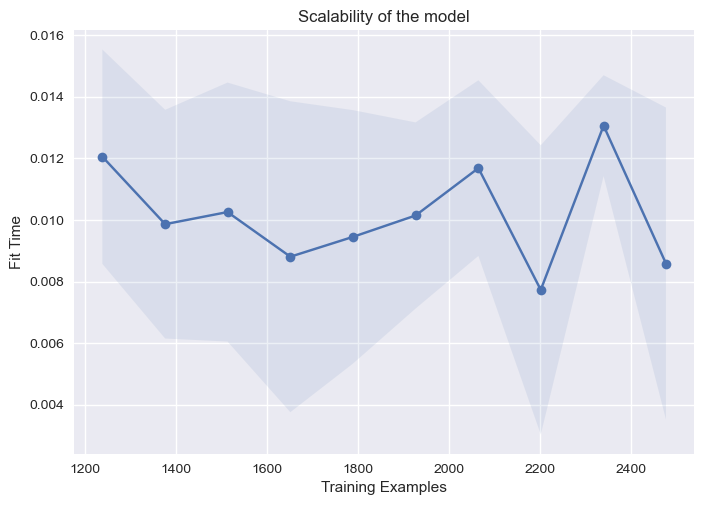

In [107]:
plt_scalibility_curve(train_sizes ,fit_times)

# Model Evaluation

In [110]:
feature_names = train_features.columns
feature_names

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

Text(0.5, 1.0, 'Linear Regression Coefficients')

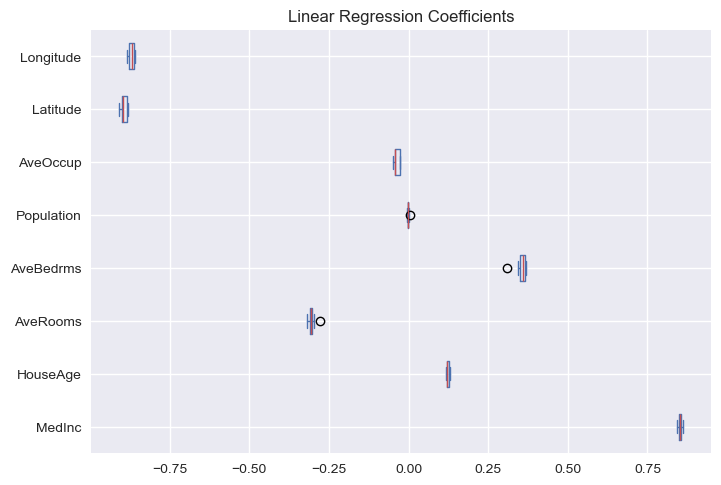

In [118]:
#examining the variability between weight vectors acorss different cross-validated models

coefs = [est[-1].coef_ for est in lin_reg_cv_results['estimator']]
weights_df = pd.DataFrame(coefs , columns=feature_names)

weights_df.plot.box(vert=False)
plt.title("Linear Regression Coefficients")

There is not much variability in weights learned by different models

In [121]:
weights_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.852153,0.122770,-0.304384,0.353528,-0.001576,-0.037059,-0.894011,-0.869753
std,0.005763,0.004312,0.010998,0.018044,0.003254,0.008582,0.009975,0.009097
min,0.843517,0.117394,-0.318971,0.307474,-0.005787,-0.047584,-0.908058,-0.884206
25%,0.848871,0.119895,-0.310778,0.349715,-0.002688,-0.042486,-0.901411,-0.876542
50%,0.852711,0.121592,-0.305795,0.360139,-0.002063,-0.042325,-0.895370,-0.869631
75%,0.854743,0.125520,-0.302980,0.364646,-0.000350,-0.027562,-0.883967,-0.862110
max,0.861659,0.130560,-0.278426,0.367952,0.005297,-0.026331,-0.881884,-0.857844


# Selecting Best Model

In [134]:
# lowest cross validated test error are the best performing model
#argmin : Returns the indices of the minimum values along an axis.
best_model_index = np.argmin(test_error)
selected_model = lin_reg_cv_results['estimator'][best_model_index]


In [140]:
#examing the model coefficients
print("Intercept w0" , selected_model['linear_reg'].intercept_)
print("Coefficients (w1,...wM): " ,selected_model['linear_reg'].coef_)

Intercept w0 2.0703700476421223
Coefficients (w1,...wM):  [ 0.84351675  0.1173944  -0.30898547  0.36482179 -0.00233719 -0.02729176
 -0.90228709 -0.87727372]


# Model Performance

In [149]:
cv_prediction = cross_val_predict(lin_reg_pipeline , train_features , train_labels)

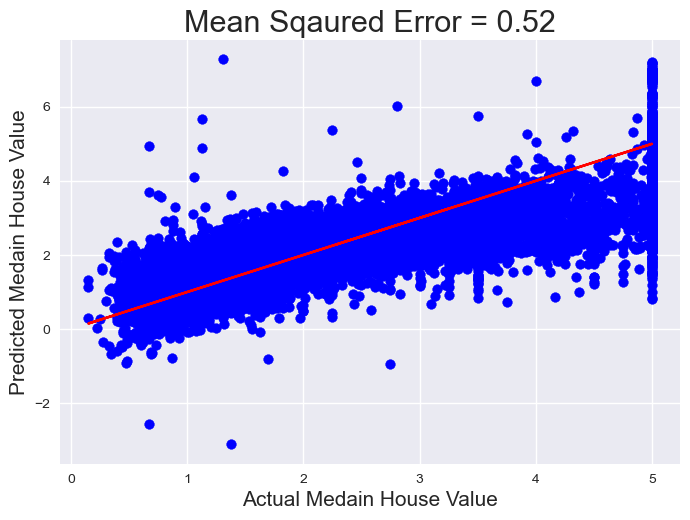

In [163]:
mse_cv = mean_squared_error(train_labels , cv_prediction)

plt.scatter(train_labels , cv_prediction , color = 'blue')
plt.plot(train_labels,train_labels,'r-')
plt.title(f"Mean Sqaured Error = {mse_cv:.2f}" , size=22)
plt.xlabel('Actual Medain House Value',size=15)
plt.ylabel('Predicted Medain House Value',size=15)
plt.show()

# Predictions

In [168]:
test_predictions_cv = selected_model.predict(test_features)
test_predictions_cv[:5]

array([0.72624726, 1.77663651, 2.71967884, 2.83353651, 2.61081943])

In [170]:
#predictions of initial model that is built without cross validations
test_predictions = lin_reg_pipeline.predict(test_features)
test_predictions[:5]

array([0.72412832, 1.76677807, 2.71151581, 2.83601179, 2.603755  ])

# Reporting Model Performance

In [175]:
score_cv = selected_model.score(test_features, test_lables)
score = lin_reg_pipeline.score(test_features, test_lables)

print ("R2 score for the best model obtained via cross validation: ", score_cv)
print ("R2 score for model without cv: ", score)

R2 score for the best model obtained via cross validation:  0.5880756230774518
R2 score for model without cv:  0.5910509795491352


In [179]:
mse = mean_squared_error(test_lables, test_predictions)
mse_cv = mean_squared_error(test_lables, test_predictions_cv)

print ("MSE for the best model obtained via cross validation: ", mse_cv)
print ("MSE for model without cv: ", mse)

MSE for the best model obtained via cross validation:  0.5450657933989707
MSE for model without cv:  0.5411287478470688
